<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">


# <center> **IA2: Challenge 1 - Redes Nueronales Densas (DNN)** </center>


In [16]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/MyDrive/')

print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive


In [17]:
#@title **imports**
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset description

Como líder del departamento de análisis de datos de un municipio en Colombia, usted debe predecir cómo es el comportamiento del **número** de hurtos del municipio en el que reside.  Para ello, utilice el [dataset](https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Hurto-por-Modalidades-Polic-a-Nacional/6sqw-8cg5/data) el cual puede descargar aquí: [Reporte de hurtos por modalidades](https://drive.google.com/uc?id=1V-axj71FKJHWIbZnYUuJz-FbOJLVTKDu) realizado por la policía nacional. El cual contiene variables tales como el departamento, municipio, el código DANE, los medios por los cuales se realizó el robo (tipos de armas), la fecha del hecho, el género, el grupo etario, el tipo de hurto, y la cantidad. Para los puntos propuestos, considere lo siguiente:

-  Seleccione un Municipio que contenga almenos 1000 registros.

- Los hurtos entre 2010 y 2021 deben ser usados para **entrenamiento (Train)**. los hurtos del 2022 deben ser usados como **Evaluación (test)**.



#**1. Punto**

Construya un modelo DNN para predecir el número de hurtos para un dia particular. Teniendo como entrada las caracteristicas: tipos de armas, el género, el grupo etario, el tipo de hurto.  

- La arquitectura debe tener mas de 3 capas.
- Seleccione y justifique una función de perdida.
- Seleccione y justifique las activaciones.
- Evidencie los resultados en test y realice unas conclusiones al respecto.

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import tensorflow as tf

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/AI-2/Taller_1/Reporte_Hurto_por_Modalidades_Polic_a_Nacional.csv')
bogota_data = data[data['MUNICIPIO'] == 'BOGOTÁ D.C. (CT)']
bogota_data['FECHA HECHO'] = pd.to_datetime(bogota_data['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')

# Dividir datos en entrenamiento y prueba
train_data = bogota_data[(bogota_data['FECHA HECHO'].dt.year >= 2010) & (bogota_data['FECHA HECHO'].dt.year <= 2021)]
test_data = bogota_data[bogota_data['FECHA HECHO'].dt.year == 2022]

# Codificar variables categóricas
features = ['ARMAS MEDIOS', 'GENERO', 'GRUPO ETARIO', 'TIPO DE HURTO']
target = 'CANTIDAD'

label_encoders = {}
for feature in features:
    le = LabelEncoder()
    train_data[feature] = le.fit_transform(train_data[feature].astype(str))
    test_data[feature] = le.transform(test_data[feature].astype(str))
    label_encoders[feature] = le

# Normalizar las características
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir y entrenar el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, batch_size=32)

# Evaluación en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


<ipython-input-141-940bd36bfb55>:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/AI-2/Taller_1/Reporte_Hurto_por_Modalidades_Polic_a_Nacional.csv')
<ipython-input-141-940bd36bfb55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bogota_data['FECHA HECHO'] = pd.to_datetime(bogota_data['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')
<ipython-input-141-940bd36bfb55>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

Epoch 1/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 32.1306 - mae: 2.7201 - val_loss: 1.7274 - val_mae: 0.5996
Epoch 2/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.8627 - mae: 2.3500 - val_loss: 1.7987 - val_mae: 0.5153
Epoch 3/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.6357 - mae: 2.2906 - val_loss: 2.0702 - val_mae: 0.5266
Epoch 4/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 23.5836 - mae: 2.3234 - val_loss: 1.9195 - val_mae: 0.5995
Epoch 5/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.5959 - mae: 2.2979 - val_loss: 1.9890 - val_mae: 0.5740
Epoch 6/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 22.4766 - mae: 2.2489 - val_loss: 1.8699 - val_mae: 0.4776
Epoch 7/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 23.4139 - mae: 2.2980 - val_loss: 1.8424 - val_mae: 0.4276
Epoch 8/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 24.2149 - mae: 2.3154 - val_loss: 1.8198 - val_mae: 0.4589
Epoch 9/20
1377/1377 ━━━━━━━━━━━

In [157]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

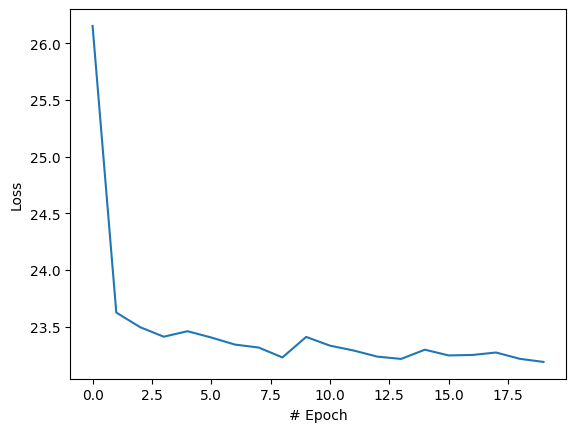

In [158]:
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history.history["loss"]);

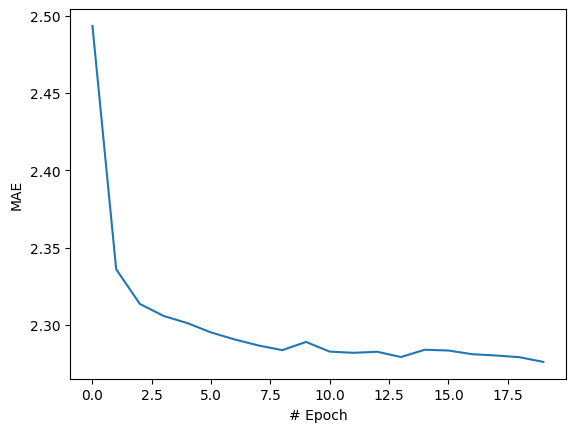

In [150]:
plt.xlabel("# Epoch");
plt.ylabel("MAE");
plt.plot(history.history["mae"]);

In [159]:
model.save('/content/drive/MyDrive/AI-2/Taller_1/modelo_punto1.h5')

In [160]:
import os
print(os.listdir())


['3D83CA9C-74A7-4977-A3BD-6EA5AFE36F8D.jpeg', 'Ceremonia de Graduación del programa de Medicina UPTC.mp4', 'POSTER FINAL .pdf', 'POSTER FINAL 2021.pdf', 'PC NUEVO 22', 'Untitled0.ipynb', 'como grabar pc windows 10 - Buscar con Google y 7 páginas más - Perfil 1_ Microsoft\u200b Edge 2022-02-05 11-26-37.mp4', 'Cómo grabar la pantalla en Windows 10 sin programas _ Tecnología - ComputerHoy.com y 7 páginas más - Perfil 1_ Microsoft\u200b Edge 2022-02-05 11-28-38.mp4', 'Tales of  freedom.gform', 'TRABAJO 1 REDES.gdoc', 'INFERENCIA.ipynb', 'Untitled1.ipynb', 'CORRELACION.ipynb', 'Avance Redes 1.gslides', 'Fase2_Grupo0xx.gdoc', 'Apuntes Simulacion.gdoc', 'Trabajo 1 Simulacion.gdoc', 'Apuntes Paralelo.gdoc', 'TRABAJO 3 SIMLUACION.gdoc', 'TRABAJO 4 SIMULACION 30 03 23.gdoc', 'Funcion de sierra.ipynb', 'LISTOS.rar', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'PROYECTO SIMULACIÓN DIGITAL 2023-1.gslides', 'Fechas importantes UIS y asistenc

#**2. Punto**

Ahora construiremos un modelo de regresión utilizando una arquitectura de tipo DNN, pero utlizando como información secuencial del número de hurtos. En este caso, el vector de caracteristicas son los hurtos que han sucedido en una ventana temporal anterior de una semana (7 dias) y un mes (30 dias). ver figura para configurar el vector de entrada. Considere los siguientes items:



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/talleres/Taller%201/tl_1pred.png" width="1000px" height="250px">



- La arquitectura debe tener mas de 3 capas.
- Seleccione y justifique una función de perdida.
- Seleccione y justifique las activaciones.
- Evidencie los resultados para ventanas historicas de una semana y de un mes en test. Realice unas conclusiones al respecto.

In [161]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf

# Cargar los datos en Colab
data = pd.read_csv('/content/drive/MyDrive/AI-2/Taller_1/Reporte_Hurto_por_Modalidades_Polic_a_Nacional.csv')
bogota_data = data[data['MUNICIPIO'] == 'BOGOTÁ D.C. (CT)']
bogota_data['FECHA HECHO'] = pd.to_datetime(bogota_data['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')

# Ordenar por fecha
bogota_data_sorted = bogota_data.sort_values('FECHA HECHO')

# Definir función para crear ventanas temporales
def create_time_windows(data, window_size, target_col):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[target_col].values[i-window_size:i])
        y.append(data[target_col].values[i])
    return np.array(X), np.array(y)

# Crear ventanas de 7 y 30 días
window_size_week = 7
window_size_month = 30

X_week, y_week = create_time_windows(bogota_data_sorted, window_size_week, 'CANTIDAD')
X_month, y_month = create_time_windows(bogota_data_sorted, window_size_month, 'CANTIDAD')

# Dividir en entrenamiento y prueba
train_week = len(bogota_data_sorted[bogota_data_sorted['FECHA HECHO'].dt.year <= 2021]) - window_size_week
train_month = len(bogota_data_sorted[bogota_data_sorted['FECHA HECHO'].dt.year <= 2021]) - window_size_month

X_train_week, X_test_week = X_week[:train_week], X_week[train_week:]
y_train_week, y_test_week = y_week[:train_week], y_week[train_week:]

X_train_month, X_test_month = X_month[:train_month], X_month[train_month:]
y_train_month, y_test_month = y_month[:train_month], y_month[train_month:]

# Definir modelo DNN
def create_dnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Capa de salida para regresión
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Entrenar modelo con ventana de 7 días
model_week = create_dnn_model(X_train_week.shape[1])
history_week = model_week.fit(X_train_week, y_train_week, epochs=20, validation_split=0.2, batch_size=32)
test_loss_week, test_mae_week = model_week.evaluate(X_test_week, y_test_week)

# Entrenar modelo con ventana de 30 días
model_month = create_dnn_model(X_train_month.shape[1])
history_month = model_month.fit(X_train_month, y_train_month, epochs=20, validation_split=0.2, batch_size=32)
test_loss_month, test_mae_month = model_month.evaluate(X_test_month, y_test_month)

print(f"7-day window -> Test Loss: {test_loss_week}, Test MAE: {test_mae_week}")
print(f"30-day window -> Test Loss: {test_loss_month}, Test MAE: {test_mae_month}")


<ipython-input-161-94d857227b71>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/AI-2/Taller_1/Reporte_Hurto_por_Modalidades_Polic_a_Nacional.csv')
<ipython-input-161-94d857227b71>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bogota_data['FECHA HECHO'] = pd.to_datetime(bogota_data['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1377/1377 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 43.8862 - mae: 2.9787 - val_loss: 3.3887 - val_mae: 1.4686
Epoch 2/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 40.6248 - mae: 2.9353 - val_loss: 2.8642 - val_mae: 0.7524
Epoch 3/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 40.2413 - mae: 2.8788 - val_loss: 2.8332 - val_mae: 0.8872
Epoch 4/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40.6519 - mae: 2.8984 - val_loss: 2.9219 - val_mae: 0.7921
Epoch 5/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 42.1056 - mae: 2.9494 - val_loss: 2.8879 - val_mae: 0.9110
Epoch 6/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 38.8995 - mae: 2.8315 - val_loss: 2.8018 - val_mae: 1.0397
Epoch 7/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 41.0989 - mae: 2.9200 - val_loss: 2.7889 - val_mae: 0.8209
Epoch 8/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40.0933 - mae: 2.8800 - val_loss: 2.7876 - val_mae: 0.7628
Epoch 9/20
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 4

In [162]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

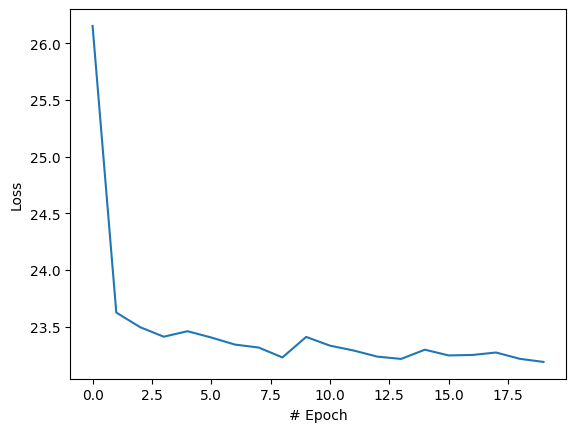

In [163]:
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history.history["loss"]);

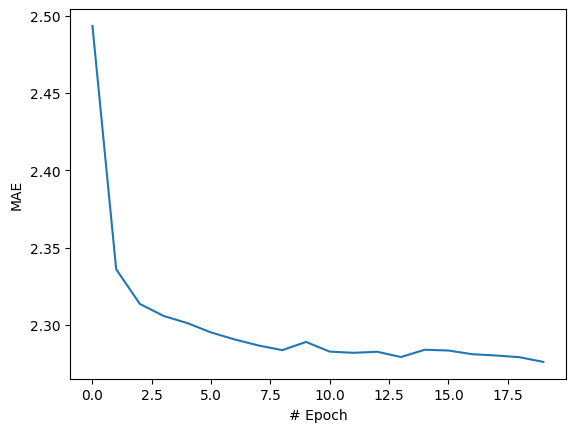

In [164]:
plt.xlabel("# Epoch");
plt.ylabel("MAE");
plt.plot(history.history["mae"]);

In [165]:
model.save('/content/drive/MyDrive/AI-2/Taller_1/modelo_punto2.h5')

In [166]:
import os
print(os.listdir())


['3D83CA9C-74A7-4977-A3BD-6EA5AFE36F8D.jpeg', 'Ceremonia de Graduación del programa de Medicina UPTC.mp4', 'POSTER FINAL .pdf', 'POSTER FINAL 2021.pdf', 'PC NUEVO 22', 'Untitled0.ipynb', 'como grabar pc windows 10 - Buscar con Google y 7 páginas más - Perfil 1_ Microsoft\u200b Edge 2022-02-05 11-26-37.mp4', 'Cómo grabar la pantalla en Windows 10 sin programas _ Tecnología - ComputerHoy.com y 7 páginas más - Perfil 1_ Microsoft\u200b Edge 2022-02-05 11-28-38.mp4', 'Tales of  freedom.gform', 'TRABAJO 1 REDES.gdoc', 'INFERENCIA.ipynb', 'Untitled1.ipynb', 'CORRELACION.ipynb', 'Avance Redes 1.gslides', 'Fase2_Grupo0xx.gdoc', 'Apuntes Simulacion.gdoc', 'Trabajo 1 Simulacion.gdoc', 'Apuntes Paralelo.gdoc', 'TRABAJO 3 SIMLUACION.gdoc', 'TRABAJO 4 SIMULACION 30 03 23.gdoc', 'Funcion de sierra.ipynb', 'LISTOS.rar', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'PROYECTO SIMULACIÓN DIGITAL 2023-1.gslides', 'Fechas importantes UIS y asistenc

#**3. Punto**
El cáncer de pecho es una de las principales causas de muerte en mujeres. El uso de modelos de inteligencia artificial, como redes neuronales profundas (DNN), para clasificar tumores como malignos o benignos, mejora el diagnóstico temprano y aumenta las tasas de supervivencia. Estos modelos identifican patrones complejos en datos médicos que son difíciles de detectar manualmente, ayudando a tomar decisiones clínicas más precisas.

El dataset proporcionado contiene información de pacientes diagnosticados con cáncer de pecho. Cada registro está asociado a un paciente único identificado mediante un ID, el tipo de cáncer (maligno o benigno) y las siguientes características visuales de las células cancerosas extraídas de imágenes de mamografías:

- **radius_mean**: Radio promedio de las células.
- **texture_mean**: Textura promedio de las células.
- **perimeter_mean**: Perímetro promedio de las células.
- **area_mean**: Área promedio de las células.
- **smoothness_mean**: Suavidad promedio de las células.
- **compactness_mean**: Compacidad promedio de las células.
- **concavity_mean**: Concavidad promedio de las células.
- **concave points_mean**: Puntos cóncavos promedio.

**Source:** https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download

El objetivo es predecir si el tipo de cáncer es maligno o benigno (clasificación binaria), a partir de estas características.

Deben desarrollar un modelo de red neuronal profunda (DNN) para la clasificación binaria de los tipos de cáncer (maligno vs benigno).

**IMPORTANTE:** Ustedes deben definir los hiperparámetros tales como:

- Numero de capas y neuronas por capa
- Epochs
- Optimizador
- Learning rate
- Tamaño del batch

**IMPORTANTE:**

- Reporten las métricas de precisión, y recall (sensibilidad) modelo en el conjunto de prueba.
- Realicen una matriz de confusión y analicen los resultados.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data3 = pd.read_csv('/content/drive/MyDrive/AI-2/Taller_1/Cancer_Data.csv')
data3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [42]:
data3.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [43]:
data3.drop('Unnamed: 32',axis=1,inplace=True)
data3.drop('id',axis=1,inplace=True)

In [44]:
#Cambiando variable de maligno por 0 y Benigno por 1

data3['diagnosis'].replace('M',0,inplace=True)
data3['diagnosis'].replace('B',1,inplace=True)


In [45]:
#Se define

X= data3.iloc[:,1:]
y= data3.iloc[:,0]


#Sacando el train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=50)

#Normalizando

X_trainN = tf.keras.utils.normalize(X_train)
X_testN = tf.keras.utils.normalize(X_test)

In [46]:
model = tf.keras.models.Sequential()

# Cambié la cantidad de neuronas y la función de activación en varias capas
model.add(tf.keras.layers.Dense(256, activation=tf.nn.leaky_relu))  # Más neuronas, Leaky ReLU
model.add(tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu))  # Leaky ReLU, para evitar saturación
model.add(tf.keras.layers.Dense(64, activation=tf.nn.elu))          # ELU en vez de tanh
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))        # Más neuronas
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))       # La capa de salida sigue con activación sigmoid

# Compilamos el modelo para que esté listo para entrenar
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [47]:
#Se modifica LR para ver cambios


opt = tf.keras.optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(X_trainN, y_train, epochs=70,batch_size=16)

Epoch 1/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6226 - loss: 0.6856
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - loss: 0.6628 
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.6638 
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6217 - loss: 0.6582 
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6316 - loss: 0.6495 
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6633 - loss: 0.6285  
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 0.6476  
Epoch 8/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - loss: 0.6325 
Epoch 9/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.6277 
Epoch 10/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.6454  
Epoch 11/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.6111  
Epoch 12/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [49]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,957 (773.27 KB)

 Trainable params: 65,985 (257.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 131,972 (515.52 KB)

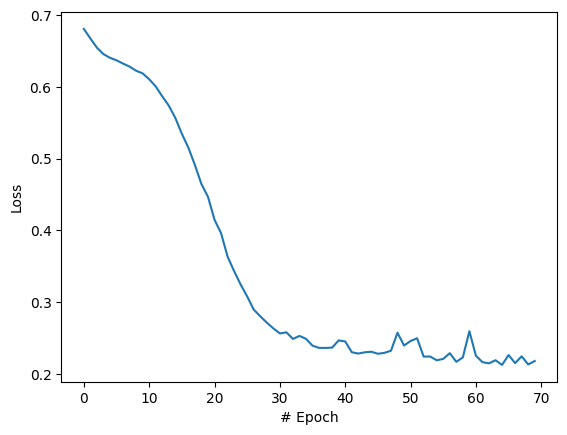

In [50]:
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history.history["loss"]);

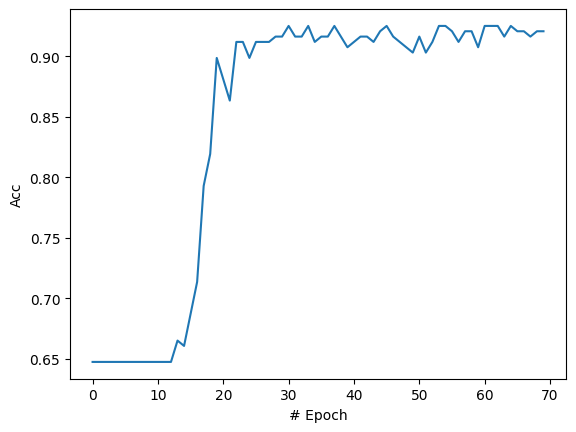

In [51]:
plt.xlabel("# Epoch");
plt.ylabel("Acc");
plt.plot(history.history['accuracy']);

In [52]:
test_loss, test_acc = model.evaluate(X_testN, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9145 - loss: 0.2138  


In [58]:
model.save('/content/drive/MyDrive/AI-2/Taller_1/modelo_punto3.h5')

In [59]:
import os
print(os.listdir())


['3D83CA9C-74A7-4977-A3BD-6EA5AFE36F8D.jpeg', 'Ceremonia de Graduación del programa de Medicina UPTC.mp4', 'POSTER FINAL .pdf', 'POSTER FINAL 2021.pdf', 'PC NUEVO 22', 'Untitled0.ipynb', 'como grabar pc windows 10 - Buscar con Google y 7 páginas más - Perfil 1_ Microsoft\u200b Edge 2022-02-05 11-26-37.mp4', 'Cómo grabar la pantalla en Windows 10 sin programas _ Tecnología - ComputerHoy.com y 7 páginas más - Perfil 1_ Microsoft\u200b Edge 2022-02-05 11-28-38.mp4', 'Tales of  freedom.gform', 'TRABAJO 1 REDES.gdoc', 'INFERENCIA.ipynb', 'Untitled1.ipynb', 'CORRELACION.ipynb', 'Avance Redes 1.gslides', 'Fase2_Grupo0xx.gdoc', 'Apuntes Simulacion.gdoc', 'Trabajo 1 Simulacion.gdoc', 'Apuntes Paralelo.gdoc', 'TRABAJO 3 SIMLUACION.gdoc', 'TRABAJO 4 SIMULACION 30 03 23.gdoc', 'Funcion de sierra.ipynb', 'LISTOS.rar', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'PROYECTO SIMULACIÓN DIGITAL 2023-1.gslides', 'Fechas importantes UIS y asistenc

In [54]:
# Guardamos las predicciones hechas por el modelo

y_pred_prob = model.predict(X_test)

# Convertir las probabilidades a etiquetas
y_pred_labels = (y_pred_prob > 0.5).astype(int)  # Esto es para clasificación binaria


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [55]:
from sklearn.metrics import precision_score, recall_score

# Calcular precisión y recall
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)

print(f'Precisión: {precision:.2f}')
print(f'Recall (Sensibilidad): {recall:.2f}')


Precisión: 0.88
Recall (Sensibilidad): 0.99


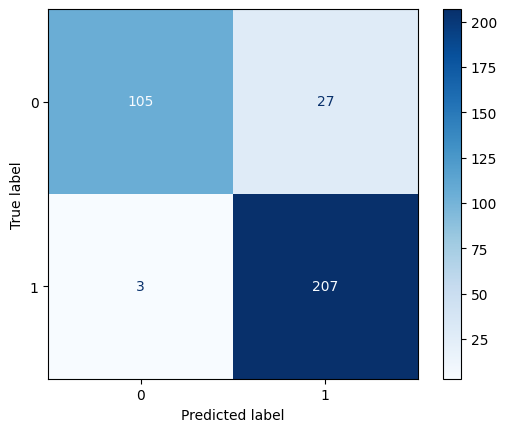

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Se obtiene la matriz de confusión
cm = confusion_matrix(y_test, y_pred_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


## **ENTREGA**

Agrega tu código como prefijo en el nombre del notebook y sigue `Archivo (File) > Descargar (Download) > Descargar .ipynb (Download .ipynb)`. Tendrás tu notebook listo para adjuntarlo en un correo a luis.guayacan@saber.uis.edu.co. ¡Mucha suerte!

**IMPORTANTE:** El asunto del correo DEBE SER 'Parcial 1 - IA2 - XXXXX', donde XXXXX corresponde al código de estudiante.

**IMPORTANTE:** El correo debe contener:
- Informe de resultados
- Notebook
- los 3 modelos en formato '.h5'


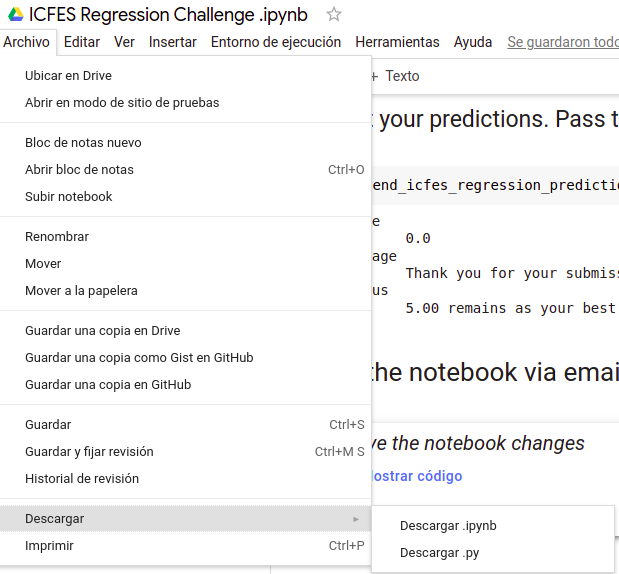